In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import glob

In [2]:
# Code useful to change format from server to local save.

#file = pd.read_csv("zDemo_data/AL.csv")
#file.head()
#new_file = pd.DataFrame(columns=[])
"""
m, n = file.shape

for x in range(m):

    Decoy = file["User_email"][x]
    Item = file["Gender"][x]
    Option_1 = file["Age"][x]
    Option_2 = file["Phantom_condition"][x]
    Option_3 = file["Race"][x]
    Choice = file["User_PID"][x]
    CatchTrials = file["Date"][x]
    Deliberation_RT = file["Survey_ID"][x]
    Choice_RT = file["Ethnicity"][x]
    Too_Slow = file["Coupling"][x]
    
    new_col = pd.DataFrame(data={"Decoy": Decoy, "Item": Item, "Option_1": Option_1, "Option_2": Option_2, "Option_3": Option_3, "Choice": Choice, "CatchTrials": CatchTrials, "Deliberation_RT": Deliberation_RT, "Choice_RT": Choice_RT, "Too_Slow": Too_Slow}, index=range(1))
    new_file = new_file.append(new_col, ignore_index = True)

new_file["Choice"][0] = "00000009"  
new_file.head(20)

"""
#file.head()

'\nm, n = file.shape\n\nfor x in range(m):\n\n    Decoy = file["User_email"][x]\n    Item = file["Gender"][x]\n    Option_1 = file["Age"][x]\n    Option_2 = file["Phantom_condition"][x]\n    Option_3 = file["Race"][x]\n    Choice = file["User_PID"][x]\n    CatchTrials = file["Date"][x]\n    Deliberation_RT = file["Survey_ID"][x]\n    Choice_RT = file["Ethnicity"][x]\n    Too_Slow = file["Coupling"][x]\n    \n    new_col = pd.DataFrame(data={"Decoy": Decoy, "Item": Item, "Option_1": Option_1, "Option_2": Option_2, "Option_3": Option_3, "Choice": Choice, "CatchTrials": CatchTrials, "Deliberation_RT": Deliberation_RT, "Choice_RT": Choice_RT, "Too_Slow": Too_Slow}, index=range(1))\n    new_file = new_file.append(new_col, ignore_index = True)\n\nnew_file["Choice"][0] = "00000009"  \nnew_file.head(20)\n\n'

In [3]:

#new_file.to_csv("zDemo_data/AL.csv")


In [4]:
def phantom_choices(option_1, option_2, option_3, choice, target_P, competitor_P):
    if((option_1 == "P_A") or (option_2 == "P_A") or (option_3 == "P_A")):
        if(choice == "A"):
            target_P = target_P + 1
        elif(choice == "B"):
            competitor_P = competitor_P + 1
    elif((option_1 == "P_B") or (option_2 == "P_B") or (option_3 == "P_B")):
        if(choice == "B"):
            target_P = target_P + 1
        elif(choice == "A"):
            competitor_P = competitor_P + 1
    return target_P, competitor_P

In [5]:
def getDecoyResponses(df, decoy_type):
    try:
        responses = df["Choice"].value_counts(normalize=True)[decoy_type]
    except KeyError:
        responses = 0
    return responses

def barGraphDecoys(mean_percentage, std_data, title):
    labels = ['Taget', 'Competitor', 'Decoy']
    x = np.arange(len(labels)) 
    y = mean_percentage
    error = std_data
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.bar(labels, y, 0.9, yerr=std_data, capsize=8)
    ax.set_ylim(0, 1)
    ax.set_ylabel('Percentage')
    ax.set_title(title)
    plt.show()    
    

In [6]:
def simDecoy_Selection(option_1, option_2, option_3, choice, target_count, competitor_count, decoy_count):
    if((option_1 == "S_A") or (option_2 == "S_A") or (option_3) == "S_A"):
        if(choice == "A"):
            target_count = target_count + 1
        elif (choice == "S_A"):
            decoy_count = decoy_count + 1
        elif (choice == "B"):
            competitor_count = competitor_count + 1
        else: 
            print("Error")
    elif((option_1 == "S_B") or (option_2 == "S_B") or (option_3 == "S_B")):
        if(choice == "B"):
            target_count = target_count + 1
        elif (choice == "S_B"):
            decoy_count = decoy_count + 1
        elif (choice== "A"):
            competitor_count = competitor_count + 1
        else: 
            print("Error")
    return target_count, competitor_count, decoy_count
        
def comDecoy_Selection(option_1, option_2, option_3, choice, target_count, competitor_count, decoy_count):
    if((option_1 == "C_A") or (option_2 == "C_A") or (option_3) == "C_A"):
        if(choice == "A"):
            target_count = target_count + 1
        elif(choice == "C_A"):
            decoy_count = decoy_count + 1
        elif(choice == "B"):
            competitor_count = competitor_count + 1
        else: 
            print("Error!") 
    elif((option_1 == "C_B") or (option_2 == "C_B") or (option_3) == "C_B"):
        if(choice == "B"):
            target_count = target_count + 1
        elif(choice == "C_B"):
            decoy_count = decoy_count + 1
        elif(choice == "A"):
            competitor_count = competitor_count + 1
        else: 
            print("Error!")
    return target_count, competitor_count, decoy_count

def attDecoy_Selection(option_1, option_2, option_3, choice, target_count, competitor_count, decoy_count):
    if((option_1 == "A_A") or (option_2 == "A_A") or (option_3 == "A_A")):
        if(choice == "A"):
            target_count = target_count + 1
        elif(choice == "A_A"):
            decoy_count = decoy_count + 1
        elif(choice == "B"):
            competitor_count = competitor_count + 1
        else: 
            print("Error!")
    elif((option_1 == "A_B") or (option_2 == "A_B") or (option_3) == "A_B"):
        if(choice == "B"):
            target_count = target_count + 1
        elif(choice == "A_B"):
            decoy_count = decoy_count + 1
        elif(choice == "A"):
            competitor_count = competitor_count + 1
        else: 
            print("Error!") 
    return target_count, competitor_count, decoy_count

In [7]:
def partFreq_Decoy(decoy_df, decoy_type):
    
    freq_name = str(decoy_type + "(freq)")
    perc_name = str(decoy_type + "(%)")
    
    freq_df = pd.DataFrame(columns=['PID', 'Target(freq)', "Competitor(freq)", freq_name, "Target(%)", "Competitor(%)", perc_name])
    
    for idx in Participants_PIDs:
        current_participant = decoy_df[decoy_df["PID"] == idx]
        current_participant = current_participant.reset_index()
        m, n = current_participant.shape 
        
        target_counter = 0
        competitor_counter = 0
        decoy_counter = 0
        
        for x in range(m):
            option_1 = current_participant["Option_1"][x]
            option_2 = current_participant["Option_2"][x]
            option_3 = current_participant["Option_3"][x]
            choice = current_participant["Choice"][x]
            
            if(decoy_type == "Sim_Decoy"):
                target_counter, competitor_counter, decoy_counter = simDecoy_Selection(option_1, option_2, option_3, choice, target_counter, competitor_counter, decoy_counter)
            elif(decoy_type == "Com_Decoy"):
                target_counter, competitor_counter, decoy_counter = comDecoy_Selection(option_1, option_2, option_3, choice, target_counter, competitor_counter, decoy_counter)
            elif(decoy_type == "Att_Decoy"):
                target_counter, competitor_counter, decoy_counter = attDecoy_Selection(option_1, option_2, option_3, choice, target_counter, competitor_counter, decoy_counter)
        
        current_participant_freq = pd.DataFrame(data={'PID': idx, 'Target(freq)': target_counter, 'Competitor(freq)': competitor_counter, freq_name: decoy_counter, 'Target(%)': target_counter/m, 'Competitor(%)': competitor_counter/m, perc_name: decoy_counter/m}, index=range(1))
        freq_df = freq_df.append(current_participant_freq, ignore_index = True)
    return freq_df

def itemFreq_Decoy(decoy_df, decoy_type):
    
    freq_name = str(decoy_type + "(freq)")
    perc_name = str(decoy_type + "(%)")
    
    item_list = decoy_df["Item"].unique()
    
    freq_df = pd.DataFrame(columns=['Item', 'Target(freq)', "Competitor(freq)", freq_name, "Target(%)", "Competitor(%)", perc_name])
    
    for item in item_list:
        current_item = decoy_df[decoy_df["Item"] == item]
        current_item = current_item.reset_index()
        m, n = current_item.shape 
        
        target_counter = 0
        competitor_counter = 0
        decoy_counter = 0
        
        for x in range(m):
            option_1 = current_item["Option_1"][x]
            option_2 = current_item["Option_2"][x]
            option_3 = current_item["Option_3"][x]
            choice = current_item["Choice"][x]
            
            if(decoy_type == "Sim_Decoy"):
                target_counter, competitor_counter, decoy_counter = simDecoy_Selection(option_1, option_2, option_3, choice, target_counter, competitor_counter, decoy_counter)
            elif(decoy_type == "Com_Decoy"):
                target_counter, competitor_counter, decoy_counter = comDecoy_Selection(option_1, option_2, option_3, choice, target_counter, competitor_counter, decoy_counter)
            elif(decoy_type == "Att_Decoy"):
                target_counter, competitor_counter, decoy_counter = attDecoy_Selection(option_1, option_2, option_3, choice, target_counter, competitor_counter, decoy_counter)
        
        current_item_freq = pd.DataFrame(data={'Item': item, 'Target(freq)': target_counter, 'Competitor(freq)': competitor_counter, freq_name: decoy_counter, 'Target(%)': target_counter/m, 'Competitor(%)': competitor_counter/m, perc_name: decoy_counter/m}, index=range(1))
        freq_df = freq_df.append(current_item_freq, ignore_index = True)
    return freq_df

def partFreq_PhantomDecoy(decoy_df):
    
    freq_df = pd.DataFrame(columns=['PID', 'Target(freq)', "Competitor(freq)", "Target(%)", "Competitor(%)"])
    
    participants_list = decoy_df["PID"].unique()
    
    for idx in participants_list:
        current_participant = decoy_df[decoy_df["PID"] == idx]
        current_participant = current_participant.reset_index()
        m, n = current_participant.shape 
        
        target_counter = 0
        competitor_counter = 0
        
        for x in range(m):
            option_1 = current_participant["Option_1"][x]
            option_2 = current_participant["Option_2"][x]
            option_3 = current_participant["Option_3"][x]
            choice = current_participant["Choice"][x]
            
            target_counter, competitor_counter = phantom_choices(option_1, option_2, option_3, choice, target_counter, competitor_counter)
        
        current_participant_freq = pd.DataFrame(data={'PID': idx, 'Target(freq)': target_counter, 'Competitor(freq)': competitor_counter, 'Target(%)': target_counter/m, 'Competitor(%)': competitor_counter/m}, index=range(1))
        freq_df = freq_df.append(current_participant_freq, ignore_index = True)
    return freq_df

def itemFreq_PhantomDecoy(decoy_df):
    
    freq_df = pd.DataFrame(columns=['Item', 'Target(freq)', "Competitor(freq)", "Target(%)", "Competitor(%)"])
    
    item_list = decoy_df["Item"].unique()
    
    for item in item_list:
        current_item = decoy_df[decoy_df["Item"] == item]
        current_item = current_item.reset_index()
        m, n = current_item.shape 
        
        target_counter = 0
        competitor_counter = 0
        
        for x in range(m):
            option_1 = current_item["Option_1"][x]
            option_2 = current_item["Option_2"][x]
            option_3 = current_item["Option_3"][x]
            choice = current_item["Choice"][x]
            
            target_counter, competitor_counter = phantom_choices(option_1, option_2, option_3, choice, target_counter, competitor_counter)
        
        current_participant_freq = pd.DataFrame(data={'Item': item, 'Target(freq)': target_counter, 'Competitor(freq)': competitor_counter, 'Target(%)': target_counter/m, 'Competitor(%)': competitor_counter/m}, index=range(1))
        freq_df = freq_df.append(current_participant_freq, ignore_index = True)
    return freq_df
            


In [8]:
#decoy_P_df[decoy_P_df["PID"] == "00000007"][0:50]

## Load and Pre-process data

In [9]:
# Now open a directory/folder "/zDemo_data"
fd = os.open("zDemo_data", os.O_RDONLY)

# Use os.fchdir() method to change the dir/folder
os.fchdir(fd)

# Safe check- Print current working directory
print("Current working dir : %s" % os.getcwd())

Current working dir : /Users/luisalvarez/Documents/Decoy/22AY_01_Code/zDemo_data


In [10]:
# use glob to get all the csv files 
# in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Create DataFrame storing the demographic info 
col_names = ['Age', 'Sex', 'Race', 'Ethnicity', 'Date', 'PID', 'SurveyID', 'Email', 'CouplingCondition', 'PhantomCondition']
demographic_info_df = pd.DataFrame(columns=col_names)

for file in csv_files: 
    df = pd.read_csv(file)
    # Check if first row contains demographic info
                      
    if((df["Item"][0] == "Male") or (df["Item"][0] == "Female") or (df["Item"][0] == "Other") or (df["Gender"][0] == "Male")): 
        Age = df["Decoy"][0]
        Sex = df["Item"][0]
        Race = df["Option_1"][0]
        Ethnicity = df["Option_2"][0]
        Date = df["Option_3"][0]
        PID = df["Choice"][0]
        #SurveyID = df["Decoy"][0]
        Email = df["Deliberation_RT"][0]
        CouplingCondition = df["Choice_RT"][0]
        PhantomCondition = df["Too_Slow"][0]

        if((df["Decoy"][0] == "norbertor@icloud.com") or (df["Decoy"][0] == "davina_ortizcobian@hotmail.com") or (df["Decoy"][0] == "aloaiza@ucsd.edu")):
            Age = df["Option_1"][0]
            Sex = df["Item"][0]
            Race = df["Option_3"][0]
            Ethnicity = df["Choice_RT"][0]
            Date = df["CatchTrials"][0]
            PID = df["Choice"][0]
            #SurveyID = df["Decoy"][0]
            Email = df["Decoy"][0]
            CouplingCondition = df["Too_Slow"][0]
            PhantomCondition = df["Option_2"][0]  
        
        demo_col = pd.DataFrame(data={'Age': Age, 'Sex': Sex, 'Race': Race, 'Ethnicity': Ethnicity, 'Date': Date, 'PID': PID, 'Email': Email, 'CouplingCondition': CouplingCondition,  'PhantomCondition': PhantomCondition}, index=range(1))
        demographic_info_df = demographic_info_df.append(demo_col, ignore_index = True)
    else: 
        print("Error: " + str(file))

demographic_info_df.head(10)

,Age,Sex,Race,Ethnicity,Date,PID,SurveyID,Email,CouplingCondition,PhantomCondition
0,23,Male,Hispanic,Hispanic,03/18/2022,00000009,NaN,aloaiza@ucsd.edu,Low coupling,Weakly_desirable
1,55,Female,Hispanic,Hispanic,03/05/2022,12345678,NaN,fgh@me.com,High coupling,Highly_desirable
2,25,Male,Hispanic,Hispanic,03/18/2022,00000007,NaN,norbertor@icloud.com,High coupling,Undesirable
3,24,Male,Hispanic,Hispanic,02/25/2022,00000003,NaN,asdfg@me.com,High coupling,Weakly_desirable
4,67,Male,Hispanic,Hispanic,02/27/2022,00000004,NaN,drma@me.com,High coupling,Weakly_desirable
5,45,Female,Hispanic,Hispanic,02/26/2022,00000002,NaN,crism@me.com,High coupling,Undesirable
6,65,Male,Hispanic,Hispanic,02/27/2022,00000001,NaN,mla@me.com,High coupling,Undesirable
7,22,Male,Hispanic,Hispanic,03/05/2022,12345672,NaN,maad@me.com,High coupling,Highly_desirable
8,26,Female,Hispanic,Hispanic,03/18/2022,00000008,NaN,davina_ortizcobian@hotmail.com,High coupling,Weakly_desirable


In [11]:
#Pre-process data 

all_responses = pd.DataFrame(columns=['Decoy', 'Item', 'Option_1', 'Option_2', 'Option_3', 'Choice', 'CatchTrials', 'Deliberation_RT', 'Choice_RT', 'Too_Slow'])

for file in csv_files: 
    df = pd.read_csv(file)
    PID = df["Choice"][0]
    phantom_condition = df["Too_Slow"][0]
    
    if((df["Decoy"][0] == "norbertor@icloud.com") or (df["Decoy"][0] == "davina_ortizcobian@hotmail.com") or (df["Decoy"][0] == "aloaiza@ucsd.edu")):
        phantom_condition = df["Option_2"][0] 
    
    #Check shape of file
    n, m = df.shape
    for x in range(n):
        #Check if each row is blank or has no info, if so, then drop
        if(df["Item"][x]=="Male" or df["Item"][x]=="Female" or df["Item"][x]=="Other" or pd.isna(df["Item"][x])):
            df.drop([x])
        else: 
            df["PID"] = PID
            df["PhantomCondition"] = phantom_condition
            all_responses = all_responses.append(df.iloc[[x]], ignore_index = True)

print(all_responses.shape)
all_responses.head(10)

(934, 14)


,Decoy,Item,Option_1,Option_2,Option_3,Choice,CatchTrials,Deliberation_RT,Choice_RT,Too_Slow,Unnamed: 0,Unnamed: 0.1,PID,PhantomCondition
0,Decoy,Item,Option_1,Option_2,Option_3,Choice,CatchTrials,Deliberation_RT,Choice_RT,Too_Slow,2.0,2.0,00000009,Weakly_desirable
1,S,Electric mop,A,B,S_B,S_B,NaN,10000,1352.4,0,5.0,5.0,00000009,Weakly_desirable
2,C,Ride-on kids car,A,B,C_A,A,NaN,10000,660.699999999,0,6.0,6.0,00000009,Weakly_desirable
3,P,Car seat,P_A,B,A,A,NaN,10000,4385.8,0,7.0,7.0,00000009,Weakly_desirable
4,F,Protein powder,B,A,C,C,NaN,10000,503.5,0,8.0,8.0,00000009,Weakly_desirable
5,A,Security camera,A_B,A,B,B,NaN,10000,302.200000003,0,9.0,9.0,00000009,Weakly_desirable
6,F,Surge protector,C,B,A,C,NaN,10000,5838.9,1,10.0,10.0,00000009,Weakly_desirable
7,S,Smart bulb,B,S_B,A,A,NaN,10000,686.400000002,0,11.0,11.0,00000009,Weakly_desirable
8,P,Baby crib,P_B,B,A,A,NaN,10000,2389.7,0,12.0,12.0,00000009,Weakly_desirable
9,C,Massage gun,A,B,C_A,C_A,NaN,10000,1871.1,0,13.0,13.0,00000009,Weakly_desirable


In [12]:
# Pre process RT data, turn 'str' to NaN, then remove NaN.
all_responses["Choice_RT"] = pd.to_numeric(all_responses["Choice_RT"], errors='coerce')
RT_df = all_responses["Choice_RT"].dropna()

In [13]:
Participants_PIDs = all_responses["PID"].unique()
print(Participants_PIDs)

['00000009' '12345678' '00000007' '00000003' '00000004' '00000002'
 '00000001' '12345672' '00000008']


## Participants RT

In [14]:
# Checking mean response time

rt_mean = RT_df.mean()
rt_mean = rt_mean/1000

print("Group mean response time: " + str(round(rt_mean, 2)) + " sec.")

Group mean response time: 2.35 sec.


In [15]:
# Checking mean response time per participant 

group_rt_df = pd.DataFrame(columns=['PID', 'Mean_RT (sec)'])

for x in Participants_PIDs:
    participant_pid = str(x)
    participant_rt = all_responses[all_responses["PID"] == x]["Choice_RT"].apply(float).mean()/1000
    participant_rt = round(participant_rt, 2)
    current_p_df = pd.DataFrame(data={'PID': participant_pid, 'Mean_RT (sec)': participant_rt}, index=range(1))
    group_rt_df = group_rt_df.append(current_p_df, ignore_index = True)

group_rt_df.head(10)

,PID,Mean_RT (sec)
0,00000009,2.03
1,12345678,3.21
2,00000007,1.67
3,00000003,3.94
4,00000004,2.20
5,00000002,1.87
6,00000001,2.42
7,12345672,1.73
8,00000008,2.08


## Catch Trials 

In [16]:
# Checking filler/catch trials work as expected.

filler_total = all_responses[all_responses["Decoy"] =="F"]["Choice"].count()
filler_catch = all_responses[all_responses["Decoy"] =="F"]["Choice"].str.count("C").sum()
filler_miis = all_responses[all_responses["Decoy"] =="F"]["Choice"].str.count("B").sum() + all_responses[all_responses["Decoy"] =="F"]["Choice"].str.count("A").sum()
print("Total number of catch trials: " + str(filler_total))
print("Total 'catch trials' caught: " + str(filler_catch))
print("Total 'catch trials missed': " + str(filler_miis))


Total number of catch trials: 180
Total 'catch trials' caught: 132
Total 'catch trials missed': 48


In [17]:
# Each participants catch trials info

group_catch_df = pd.DataFrame(columns=['PID', 'Catch(freq)', 'Miss(freq)', 'Catch(%)', 'Miss(%)'])

for x in Participants_PIDs:
    participant_pid = str(x)
    current_part_catch_df = all_responses[all_responses["PID"] == x]
    current_part_catch_df = current_part_catch_df[current_part_catch_df["Decoy"] =="F"]
    current_part_total_trials = current_part_catch_df["Choice"].count()
    current_part_catch_freq = current_part_catch_df["Choice"].str.count("C").sum()
    current_part_miss_freq = current_part_catch_df["Choice"].str.count("B").sum() + current_part_catch_df["Choice"].str.count("A").sum()
    current_part_catch_perc = current_part_catch_freq/current_part_total_trials
    current_part_miss_perc = current_part_miss_freq/current_part_total_trials
    
    current_p_df = pd.DataFrame(data={'PID': participant_pid, 'Catch(freq)': current_part_catch_freq, "Miss(freq)": current_part_miss_freq, "Catch(%)": current_part_catch_perc, "Miss(%)": current_part_miss_perc}, index=range(1))
    group_catch_df = group_catch_df.append(current_p_df, ignore_index = True)
group_catch_df.head(10)


,PID,Catch(freq),Miss(freq),Catch(%),Miss(%)
0,00000009,17,3,0.85,0.15
1,12345678,15,5,0.75,0.25
2,00000007,13,7,0.65,0.35
3,00000003,15,5,0.75,0.25
4,00000004,10,10,0.50,0.50
5,00000002,17,3,0.85,0.15
6,00000001,14,6,0.70,0.30
7,12345672,15,5,0.75,0.25
8,00000008,16,4,0.80,0.20


## Similarity Decoy

Group Mean Target: 0.33%
Group Mean Competitor: 0.26%
Group Mean Decoy: 0.41%

Target std: 0.14%
Competitor std: 0.05%
Decoy std: 0.13%


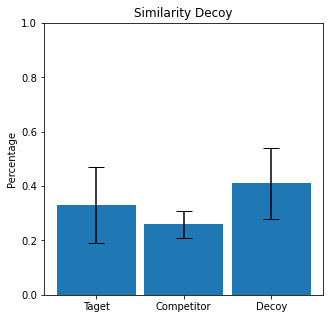

In [18]:
decoy_S_df = all_responses[all_responses["Decoy"] == "S"]
decoy_S_df = decoy_S_df.reset_index()

group_sim_freq_df = partFreq_Decoy(decoy_S_df, "Sim_Decoy")

target_S_mean = round(group_sim_freq_df["Target(%)"].mean(), 2)
competitor_S_mean = round(group_sim_freq_df["Competitor(%)"].mean(), 2)
decoy_S_mean = round(group_sim_freq_df["Sim_Decoy(%)"].mean(), 2)

target_S_std = round(group_sim_freq_df["Target(%)"].std(), 2)
competitor_S_std = round(group_sim_freq_df["Competitor(%)"].std(), 2)
decoy_S_std = round(group_sim_freq_df["Sim_Decoy(%)"].std(), 2)

print("Group Mean Target: " + str(target_S_mean) + "%")
print("Group Mean Competitor: " + str(competitor_S_mean) + "%")
print("Group Mean Decoy: " + str(decoy_S_mean) + "%")

print("\nTarget std: " + str(target_S_std) + "%")
print("Competitor std: " + str(competitor_S_std) + "%")
print("Decoy std: " + str(decoy_S_std) + "%")

sim_decoy_mean_perc = np.array([target_S_mean, competitor_S_mean, decoy_S_mean])
sim_decoy_stds = np.array([target_S_std, competitor_S_std, decoy_S_std])

barGraphDecoys(sim_decoy_mean_perc, sim_decoy_stds, 'Similarity Decoy')

In [19]:
#Similarity Decoy (Inv. part. data)
group_sim_freq_df.head(10)

,PID,Target(freq),Competitor(freq),Sim_Decoy(freq),Target(%),Competitor(%),Sim_Decoy(%)
0,00000009,6,6,8,0.30,0.30,0.40
1,12345678,8,6,6,0.40,0.30,0.30
2,00000007,4,6,10,0.20,0.30,0.50
3,00000003,5,6,9,0.25,0.30,0.45
4,00000004,7,6,7,0.35,0.30,0.35
5,00000002,7,3,10,0.35,0.15,0.50
6,00000001,7,5,8,0.35,0.25,0.40
7,12345672,13,4,3,0.65,0.20,0.15
8,00000008,3,5,12,0.15,0.25,0.60


## Compromise Decoy

Group Mean Target: 0.57%
Group Mean Competitor: 0.27%
Group Mean Decoy: 0.16%

Target std: 0.12%
Competitor std: 0.07%
Decoy std: 0.11%


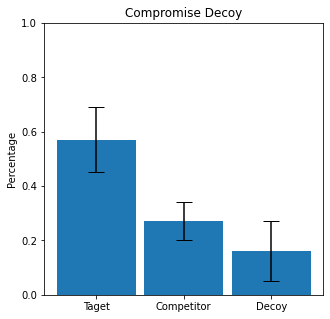

In [20]:
decoy_C_df = all_responses[all_responses["Decoy"] == "C"]
decoy_C_df = decoy_C_df.reset_index()

group_com_freq_df = partFreq_Decoy(decoy_C_df, "Com_Decoy")

target_C_mean = round(group_com_freq_df["Target(%)"].mean(), 2)
competitor_C_mean = round(group_com_freq_df["Competitor(%)"].mean(), 2)
decoy_C_mean = round(group_com_freq_df["Com_Decoy(%)"].mean(), 2)

target_C_std = round(group_com_freq_df["Target(%)"].std(), 2)
competitor_C_std = round(group_com_freq_df["Competitor(%)"].std(), 2)
decoy_C_std = round(group_com_freq_df["Com_Decoy(%)"].std(), 2)

print("Group Mean Target: " + str(target_C_mean) + "%")
print("Group Mean Competitor: " + str(competitor_C_mean) + "%")
print("Group Mean Decoy: " + str(decoy_C_mean) + "%")

print("\nTarget std: " + str(target_C_std) + "%")
print("Competitor std: " + str(competitor_C_std) + "%")
print("Decoy std: " + str(decoy_C_std) + "%")

com_decoy_mean_perc = np.array([target_C_mean, competitor_C_mean, decoy_C_mean])
com_decoy_stds = np.array([target_C_std, competitor_C_std, decoy_C_std])

barGraphDecoys(com_decoy_mean_perc, com_decoy_stds, 'Compromise Decoy')

In [21]:
group_com_freq_df.head(10)

,PID,Target(freq),Competitor(freq),Com_Decoy(freq),Target(%),Competitor(%),Com_Decoy(%)
0,00000009,13,3,4,0.65,0.15,0.20
1,12345678,13,6,1,0.65,0.30,0.05
2,00000007,9,6,5,0.45,0.30,0.25
3,00000003,13,6,1,0.65,0.30,0.05
4,00000004,9,8,3,0.45,0.40,0.15
5,00000002,13,4,3,0.65,0.20,0.15
6,00000001,7,5,8,0.35,0.25,0.40
7,12345672,14,5,1,0.70,0.25,0.05
8,00000008,12,5,3,0.60,0.25,0.15


## Attraction Decoy

Group Mean Target: 0.52%
Group Mean Competitor: 0.34%
Group Mean Decoy: 0.14%

Target std: 0.18%
Competitor std: 0.09%
Decoy std: 0.12%


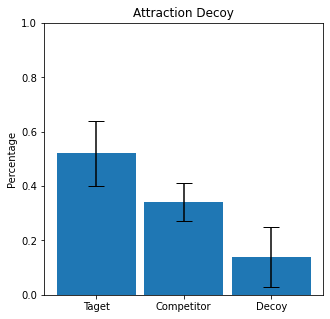

In [22]:
decoy_A_df = all_responses[all_responses["Decoy"] == "A"]
decoy_A_df = decoy_A_df.reset_index()

group_att_freq_df = partFreq_Decoy(decoy_A_df, "Att_Decoy")

target_A_mean = round(group_att_freq_df["Target(%)"].mean(), 2)
competitor_A_mean = round(group_att_freq_df["Competitor(%)"].mean(), 2)
decoy_A_mean = round(group_att_freq_df["Att_Decoy(%)"].mean(), 2)

target_A_std = round(group_att_freq_df["Target(%)"].std(), 2)
competitor_A_std = round(group_att_freq_df["Competitor(%)"].std(), 2)
decoy_A_std = round(group_att_freq_df["Att_Decoy(%)"].std(), 2)

print("Group Mean Target: " + str(target_A_mean) + "%")
print("Group Mean Competitor: " + str(competitor_A_mean) + "%")
print("Group Mean Decoy: " + str(decoy_A_mean) + "%")

print("\nTarget std: " + str(target_A_std) + "%")
print("Competitor std: " + str(competitor_A_std) + "%")
print("Decoy std: " + str(decoy_A_std) + "%")

att_decoy_mean_perc = np.array([target_A_mean, competitor_A_mean, decoy_A_mean])
att_decoy_stds = np.array([target_C_std, competitor_C_std, decoy_C_std])

barGraphDecoys(att_decoy_mean_perc, att_decoy_stds, 'Attraction Decoy')

In [23]:
group_att_freq_df.head(10)

,PID,Target(freq),Competitor(freq),Att_Decoy(freq),Target(%),Competitor(%),Att_Decoy(%)
0,00000009,10,9,1,0.50,0.45,0.05
1,12345678,11,6,3,0.55,0.30,0.15
2,00000007,9,7,4,0.45,0.35,0.20
3,00000003,8,9,3,0.40,0.45,0.15
4,00000004,12,7,1,0.60,0.35,0.05
5,00000002,15,4,1,0.75,0.20,0.05
6,00000001,3,9,8,0.15,0.45,0.40
7,12345672,10,6,4,0.50,0.30,0.20
8,00000008,15,5,0,0.75,0.25,0.00


## Phantom Decoys

### Highly Desirable Group

In [24]:
# Phantom Decoy: Highly Desirable
decoy_P_df = all_responses[all_responses["Decoy"] == "P"]
decoy_P_df = decoy_P_df.reset_index()

decoy_P_HD_df = decoy_P_df[decoy_P_df["PhantomCondition"] == "Highly_desirable"]

decoy_P_HD_freq_df = partFreq_PhantomDecoy(decoy_P_HD_df)

target_P_HD_mean = round(decoy_P_HD_freq_df["Target(%)"].mean(), 2)
competitor_P_HD_mean = round(decoy_P_HD_freq_df["Competitor(%)"].mean(), 2)

target_P_HD_std = round(decoy_P_HD_freq_df["Target(%)"].std(), 2)
competitor_P_HD_std = round(decoy_P_HD_freq_df["Competitor(%)"].std(), 2)

print("Target mean: " + str(target_P_HD_mean) + "%")
print("Competitor mean: " + str(competitor_P_HD_mean) + "%")

print("\nTarget std: " + str(target_P_HD_std) + "%")
print("Competitor std: " + str(competitor_P_HD_std) + "%")

decoy_P_HD_freq_df.head(10)

Target mean: 0.47%
Competitor mean: 0.53%

Target std: 0.04%
Competitor std: 0.04%


,PID,Target(freq),Competitor(freq),Target(%),Competitor(%)
0,12345678,9,11,0.45,0.55
1,12345672,10,10,0.50,0.50


### Weakly Desirable Group

In [25]:
# Phantom Decoy: Weakly Desirable
decoy_P_WD_df = decoy_P_df[decoy_P_df["PhantomCondition"] == "Weakly_desirable"]

decoy_P_WD_freq_df = partFreq_PhantomDecoy(decoy_P_WD_df)

target_P_WD_mean = round(decoy_P_WD_freq_df["Target(%)"].mean(), 2)
competitor_P_WD_mean = round(decoy_P_WD_freq_df["Competitor(%)"].mean(), 2)

target_P_WD_std = round(decoy_P_WD_freq_df["Target(%)"].std(), 2)
competitor_P_WD_std = round(decoy_P_WD_freq_df["Competitor(%)"].std(), 2)

print("Target mean: " + str(target_P_WD_mean) + "%")
print("Competitor mean: " + str(competitor_P_WD_mean) + "%")

print("\nTarget std: " + str(target_P_WD_std) + "%")
print("Competitor std: " + str(competitor_P_WD_std) + "%")

decoy_P_WD_freq_df.head(10)

Target mean: 0.45%
Competitor mean: 0.55%

Target std: 0.08%
Competitor std: 0.08%


,PID,Target(freq),Competitor(freq),Target(%),Competitor(%)
0,00000009,9,11,0.45,0.55
1,00000003,9,11,0.45,0.55
2,00000004,7,13,0.35,0.65
3,00000008,11,9,0.55,0.45


### Undesirable Group

In [26]:
# Phantom Decoy: Undesirable
decoy_P_U_df = decoy_P_df[decoy_P_df["PhantomCondition"] == "Undesirable"]

decoy_P_U_freq_df = partFreq_PhantomDecoy(decoy_P_U_df)

target_P_U_mean = round(decoy_P_U_freq_df["Target(%)"].mean(), 2)
competitor_P_U_mean = round(decoy_P_U_freq_df["Competitor(%)"].mean(), 2)

target_P_U_std = round(decoy_P_U_freq_df["Target(%)"].std(), 2)
competitor_P_U_std = round(decoy_P_U_freq_df["Competitor(%)"].std(), 2)

print("Target mean: " + str(target_P_U_mean) + "%")
print("Competitor mean: " + str(competitor_P_U_mean) + "%")

print("\nTarget std: " + str(target_P_U_std) + "%")
print("Competitor std: " + str(competitor_P_U_std) + "%")

decoy_P_U_freq_df.head(10)

Target mean: 0.52%
Competitor mean: 0.48%

Target std: 0.06%
Competitor std: 0.06%


,PID,Target(freq),Competitor(freq),Target(%),Competitor(%)
0,00000007,9,11,0.45,0.55
1,00000002,11,9,0.55,0.45
2,00000001,11,9,0.55,0.45


### Displaying All Phantoms

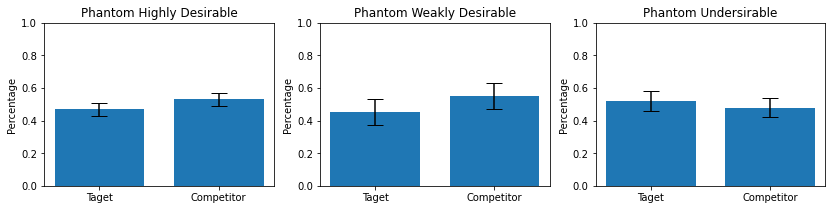

In [27]:
labels = ['Taget', 'Competitor']

x = np.arange(len(labels))

y1 = np.array([target_P_HD_mean, competitor_P_HD_mean])
y2 = np.array([target_P_WD_mean, competitor_P_WD_mean])
y3 = np.array([target_P_U_mean, competitor_P_U_mean])

error1 = np.array([target_P_HD_std, competitor_P_HD_std])
error2 = np.array([target_P_WD_std, competitor_P_WD_std])
error3 = np.array([target_P_U_std, competitor_P_U_std])

ys = np.array([y1, y2, y3])
errors = np.array([error1, error2, error3])
titles = ["Phantom Highly Desirable", "Phantom Weakly Desirable", "Phantom Undersirable"]

fig, ax = plt.subplots(1, 3, figsize=(14, 3))
                       
for x in range(3):
    ax[x].bar(labels, ys[x], 0.75, yerr=errors[x], capsize=8)
    ax[x].set_ylim(0, 1)
    ax[x].set_ylabel('Percentage')
    ax[x].set_title(titles[x])
                                    
plt.show()

## Inspecting Individual Items

### Similarity Decoy

In [28]:
decoy_S_TargetA_df = decoy_S_df.loc[decoy_S_df['Option_1'].str.contains('S_A') | decoy_S_df['Option_2'].str.contains('S_A') | decoy_S_df['Option_3'].str.contains('S_A')]
decoy_S_TargetB_df = decoy_S_df.loc[decoy_S_df['Option_1'].str.contains('S_B') | decoy_S_df['Option_2'].str.contains('S_B') | decoy_S_df['Option_3'].str.contains('S_B')]

decoy_S_Items_TargetA_df = itemFreq_Decoy(decoy_S_TargetA_df, "Sim_Decoy")
decoy_S_Items_TargetB_df = itemFreq_Decoy(decoy_S_TargetB_df, "Sim_Decoy")

item_list = decoy_S_TargetA_df["Item"].unique()
item_list = np.sort(item_list)

Sim_items_targets_A = np.array([])
Sim_items_competitors_A = np.array([])
Sim_items_decoys_A = np.array([])

Sim_items_targets_B = np.array([])
Sim_items_competitors_B = np.array([])
Sim_items_decoys_B = np.array([])

for item in item_list:
    
    current_item_A = decoy_S_Items_TargetA_df[decoy_S_Items_TargetA_df["Item"] == item]
    current_item_B = decoy_S_Items_TargetB_df[decoy_S_Items_TargetB_df["Item"] == item]
    
    Sim_items_targets_A = np.append(Sim_items_targets_A, current_item_A["Target(%)"])
    Sim_items_competitors_A = np.append(Sim_items_competitors_A, current_item_A["Competitor(%)"])
    Sim_items_decoys_A = np.append(Sim_items_decoys_A, current_item_A["Sim_Decoy(%)"])
    
    Sim_items_targets_B = np.append(Sim_items_targets_B, current_item_B["Target(%)"])
    Sim_items_competitors_B = np.append(Sim_items_competitors_B, current_item_B["Competitor(%)"])
    Sim_items_decoys_B = np.append(Sim_items_decoys_B, current_item_B["Sim_Decoy(%)"])
    
#decoy_S_Items_TargetA_df.head()

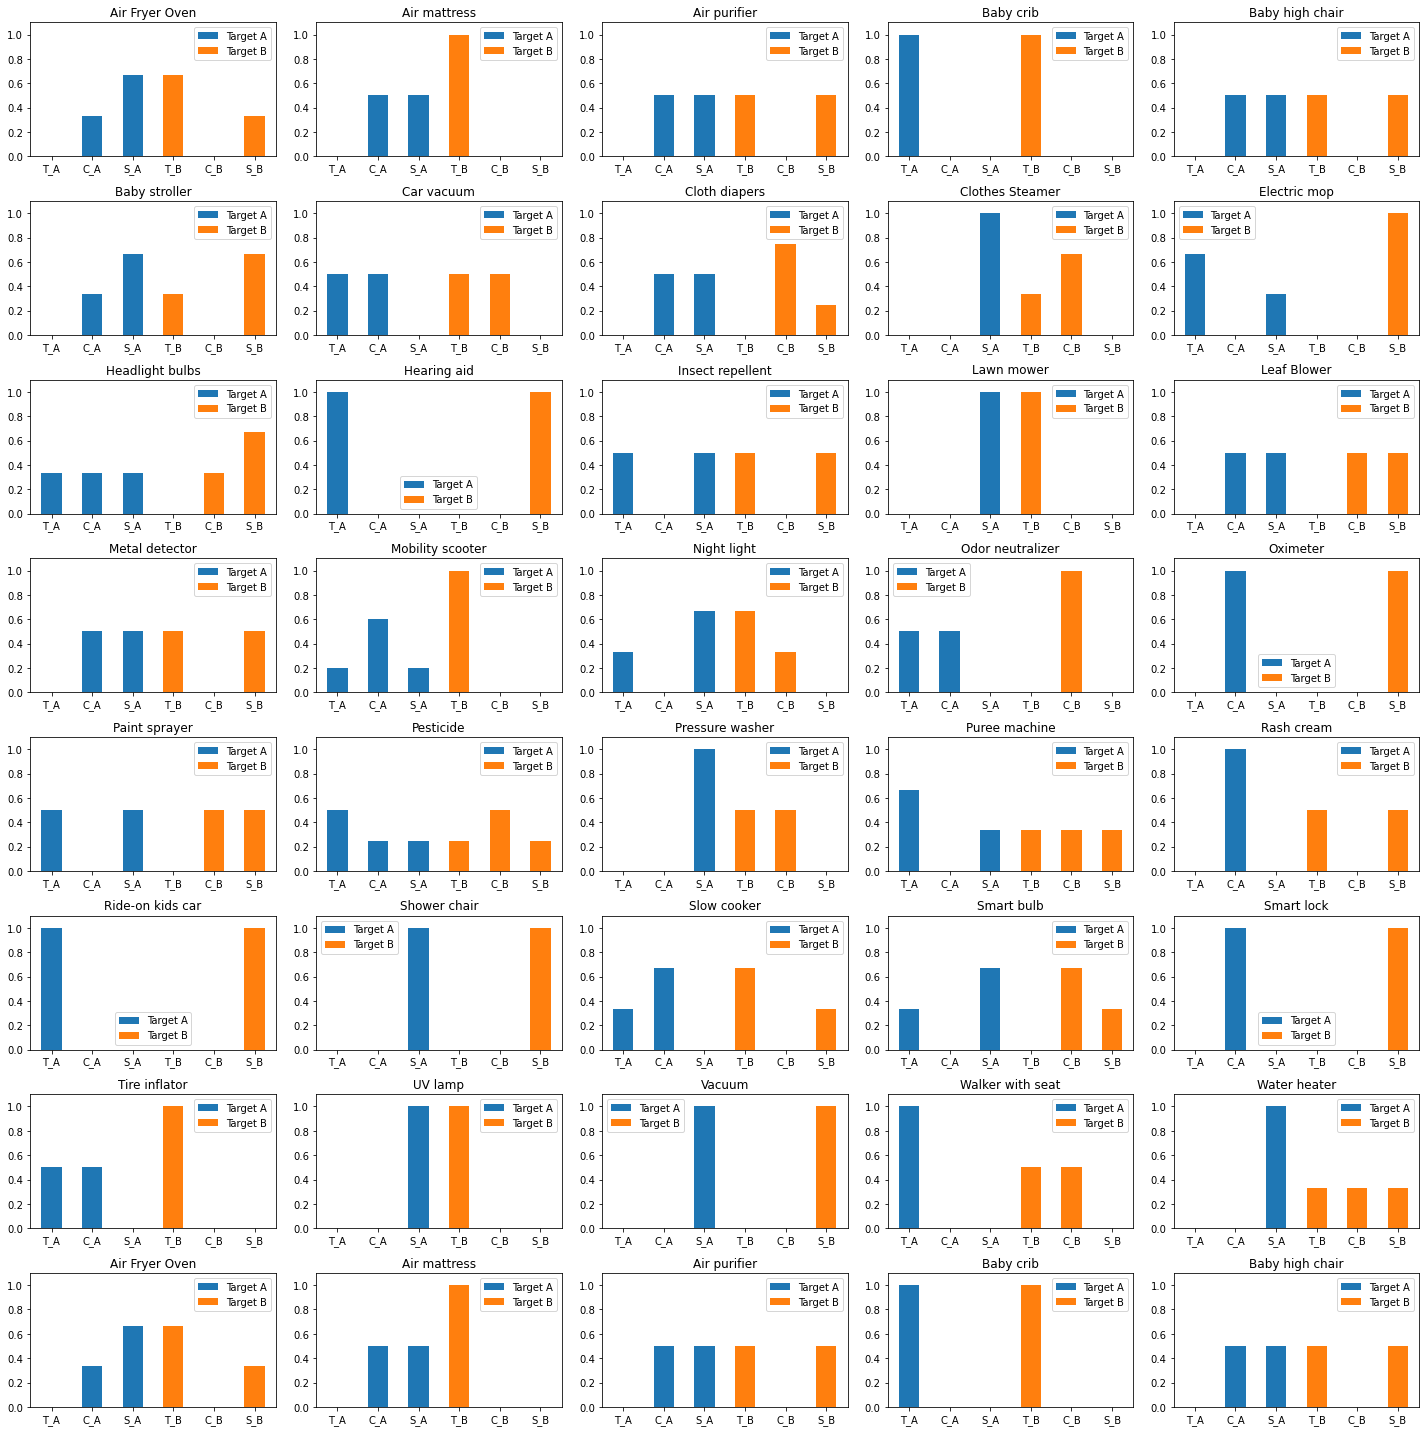

In [29]:
fig, ax = plt.subplots(8, 5, figsize=(20, 20))

counter = 0

labels1 = ["T_A", "C_A", "S_A"]
labels2 = ["T_B", "C_B", "S_B"]

n = Sim_items_targets_A.shape[0]

for x in range(8):
    
    for xi in range(5):
        
        if (counter == (n - 1)):
            counter = 0
        
        y1 = np.array([Sim_items_targets_A[counter], Sim_items_competitors_A[counter], Sim_items_decoys_A[counter]])
        y2 = np.array([Sim_items_targets_B[counter], Sim_items_competitors_B[counter], Sim_items_decoys_B[counter]])
        ax[x][xi].bar(labels1, y1, 0.5, capsize=8, label="Target A")
        ax[x][xi].bar(labels2, y2, 0.5, capsize=8, label="Target B")
        ax[x][xi].set_ylim(0, 1.1)
        ax[x][xi].set_title(item_list[counter])
        ax[x][xi].legend()
        counter = counter + 1

plt.tight_layout()

### Compromise Decoy

In [43]:
decoy_C_TargetA_df = decoy_C_df.loc[decoy_C_df['Option_1'].str.contains('C_A') | decoy_C_df['Option_2'].str.contains('C_A') | decoy_C_df['Option_3'].str.contains('C_A')]
decoy_C_TargetB_df = decoy_C_df.loc[decoy_C_df['Option_1'].str.contains('C_B') | decoy_C_df['Option_2'].str.contains('C_B') | decoy_C_df['Option_3'].str.contains('C_B')]

decoy_C_Items_TargetA_df = itemFreq_Decoy(decoy_C_TargetA_df, "Com_Decoy")
decoy_C_Items_TargetB_df = itemFreq_Decoy(decoy_C_TargetB_df, "Com_Decoy")

item_list = decoy_C_TargetA_df["Item"].unique()
item_list = np.sort(item_list)

Com_items_targets_A = np.array([])
Com_items_competitors_A = np.array([])
Com_items_decoys_A = np.array([])

Com_items_targets_B = np.array([])
Com_items_competitors_B = np.array([])
Com_items_decoys_B = np.array([])

for item in item_list:
    
    current_item_A = decoy_C_Items_TargetA_df[decoy_C_Items_TargetA_df["Item"] == item]
    current_item_B = decoy_C_Items_TargetB_df[decoy_C_Items_TargetB_df["Item"] == item]
    
    Com_items_targets_A = np.append(Com_items_targets_A, current_item_A["Target(%)"])
    Com_items_competitors_A = np.append(Com_items_competitors_A, current_item_A["Competitor(%)"])
    Com_items_decoys_A = np.append(Com_items_decoys_A, current_item_A["Com_Decoy(%)"])
    
    Com_items_targets_B = np.append(Com_items_targets_B, current_item_B["Target(%)"])
    Com_items_competitors_B = np.append(Com_items_competitors_B, current_item_B["Competitor(%)"])
    Com_items_decoys_B = np.append(Com_items_decoys_B, current_item_B["Com_Decoy(%)"])


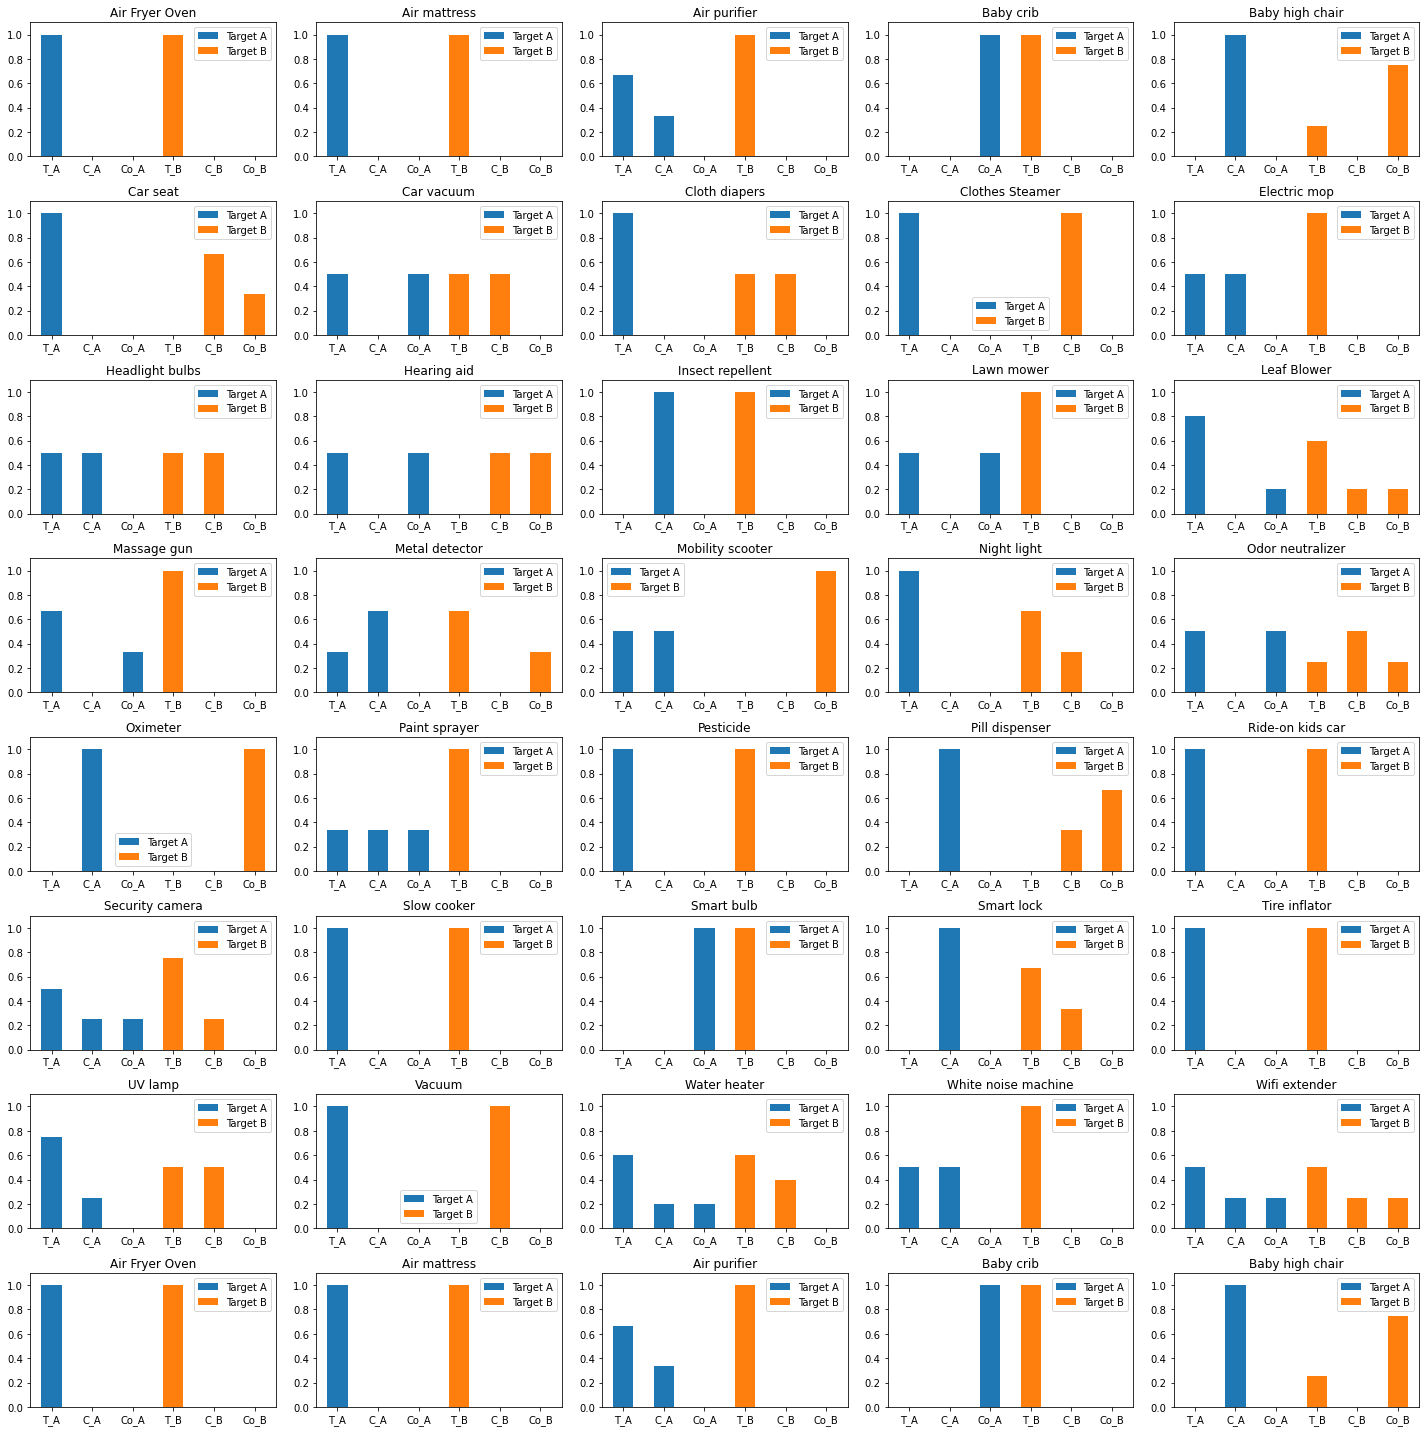

In [45]:
fig, ax = plt.subplots(8, 5, figsize=(20, 20))

counter = 0

labels1 = ["T_A", "C_A", "Co_A"]
labels2 = ["T_B", "C_B", "Co_B"]

n = Com_items_targets_A.shape[0]

for x in range(8):
    
    for xi in range(5):
        
        if (counter == (n)):
            counter = 0
        
        y1 = np.array([Com_items_targets_A[counter], Com_items_competitors_A[counter], Com_items_decoys_A[counter]])
        y2 = np.array([Com_items_targets_B[counter], Com_items_competitors_B[counter], Com_items_decoys_B[counter]])
        ax[x][xi].bar(labels1, y1, 0.5, capsize=8, label="Target A")
        ax[x][xi].bar(labels2, y2, 0.5, capsize=8, label="Target B")
        ax[x][xi].set_ylim(0, 1.1)
        ax[x][xi].set_title(item_list[counter])
        ax[x][xi].legend()
        counter = counter + 1

plt.tight_layout()

### Attention Decoy

In [46]:
decoy_A_TargetA_df = decoy_A_df.loc[decoy_A_df['Option_1'].str.contains('A_A') | decoy_A_df['Option_2'].str.contains('A_A') | decoy_A_df['Option_3'].str.contains('A_A')]
decoy_A_TargetB_df = decoy_A_df.loc[decoy_A_df['Option_1'].str.contains('A_B') | decoy_A_df['Option_2'].str.contains('A_B') | decoy_A_df['Option_3'].str.contains('A_B')]

decoy_A_Items_TargetA_df = itemFreq_Decoy(decoy_A_TargetA_df, "Att_Decoy")
decoy_A_Items_TargetB_df = itemFreq_Decoy(decoy_A_TargetB_df, "Att_Decoy")

item_list = decoy_A_TargetA_df["Item"].unique()
item_list = np.sort(item_list)

Att_items_targets_A = np.array([])
Att_items_competitors_A = np.array([])
Att_items_decoys_A = np.array([])

Att_items_targets_B = np.array([])
Att_items_competitors_B = np.array([])
Att_items_decoys_B = np.array([])

for item in item_list:
    
    current_item_A = decoy_A_Items_TargetA_df[decoy_A_Items_TargetA_df["Item"] == item]
    current_item_B = decoy_A_Items_TargetB_df[decoy_A_Items_TargetB_df["Item"] == item]
    
    Att_items_targets_A = np.append(Att_items_targets_A, current_item_A["Target(%)"])
    Att_items_competitors_A = np.append(Att_items_competitors_A, current_item_A["Competitor(%)"])
    Att_items_decoys_A = np.append(Att_items_decoys_A, current_item_A["Att_Decoy(%)"])
    
    Att_items_targets_B = np.append(Att_items_targets_B, current_item_B["Target(%)"])
    Att_items_competitors_B = np.append(Att_items_competitors_B, current_item_B["Competitor(%)"])
    Att_items_decoys_B = np.append(Att_items_decoys_B, current_item_B["Att_Decoy(%)"])


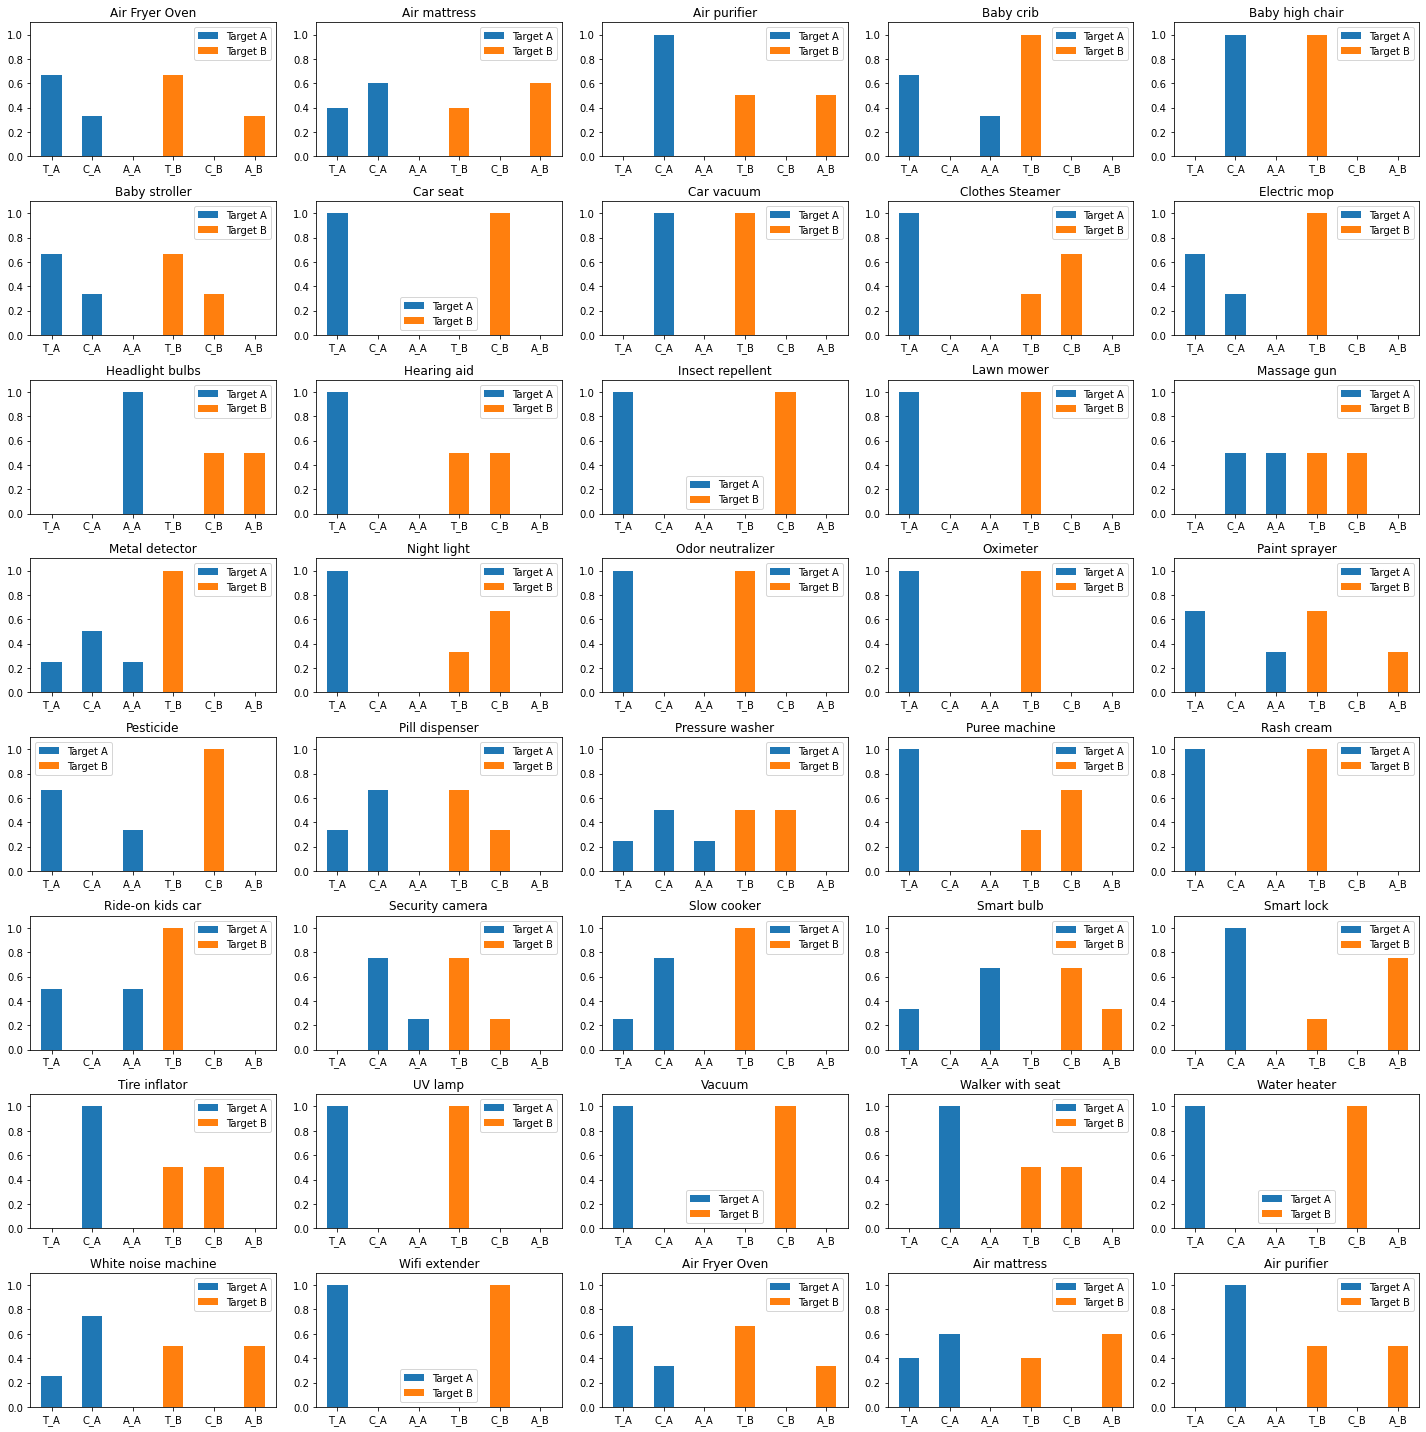

In [47]:
fig, ax = plt.subplots(8, 5, figsize=(20, 20))

counter = 0

labels1 = ["T_A", "C_A", "A_A"]
labels2 = ["T_B", "C_B", "A_B"]

n = Att_items_targets_A.shape[0]

for x in range(8):
    
    for xi in range(5):
        
        if (counter == (n)):
            counter = 0
        
        y1 = np.array([Att_items_targets_A[counter], Att_items_competitors_A[counter], Att_items_decoys_A[counter]])
        y2 = np.array([Att_items_targets_B[counter], Att_items_competitors_B[counter], Att_items_decoys_B[counter]])
        ax[x][xi].bar(labels1, y1, 0.5, capsize=8, label="Target A")
        ax[x][xi].bar(labels2, y2, 0.5, capsize=8, label="Target B")
        ax[x][xi].set_ylim(0, 1.1)
        ax[x][xi].set_title(item_list[counter])
        ax[x][xi].legend()
        counter = counter + 1

plt.tight_layout()

### Phantom Decoy

In [34]:
decoy_P_TargetA_df = decoy_P_df.loc[decoy_P_df['Option_1'].str.contains('P_A') | decoy_P_df['Option_2'].str.contains('P_A') | decoy_P_df['Option_3'].str.contains('P_A')]
decoy_P_TargetB_df = decoy_P_df.loc[decoy_P_df['Option_1'].str.contains('P_B') | decoy_P_df['Option_2'].str.contains('P_B') | decoy_P_df['Option_3'].str.contains('P_B')]
decoy_P_Items_TargetA_df = itemFreq_PhantomDecoy(decoy_P_TargetA_df)
decoy_P_Items_TargetB_df = itemFreq_PhantomDecoy(decoy_P_TargetB_df)

item_list = decoy_P_TargetA_df["Item"].unique()
item_list = np.sort(item_list)

Phan_items_targets_A = np.array([])
Phan_items_competitors_A = np.array([])

Phan_items_targets_B = np.array([])
Phan_items_competitors_B = np.array([])

for item in item_list:
    
    current_item_A = decoy_P_Items_TargetA_df[decoy_P_Items_TargetA_df["Item"] == item]
    current_item_B = decoy_P_Items_TargetB_df[decoy_P_Items_TargetB_df["Item"] == item]
    
    Phan_items_targets_A = np.append(Phan_items_targets_A, current_item_A["Target(%)"])
    Phan_items_competitors_A = np.append(Phan_items_competitors_A, current_item_A["Competitor(%)"])
    
    Phan_items_targets_B = np.append(Phan_items_targets_B, current_item_B["Target(%)"])
    Phan_items_competitors_B = np.append(Phan_items_competitors_B, current_item_B["Competitor(%)"])

    

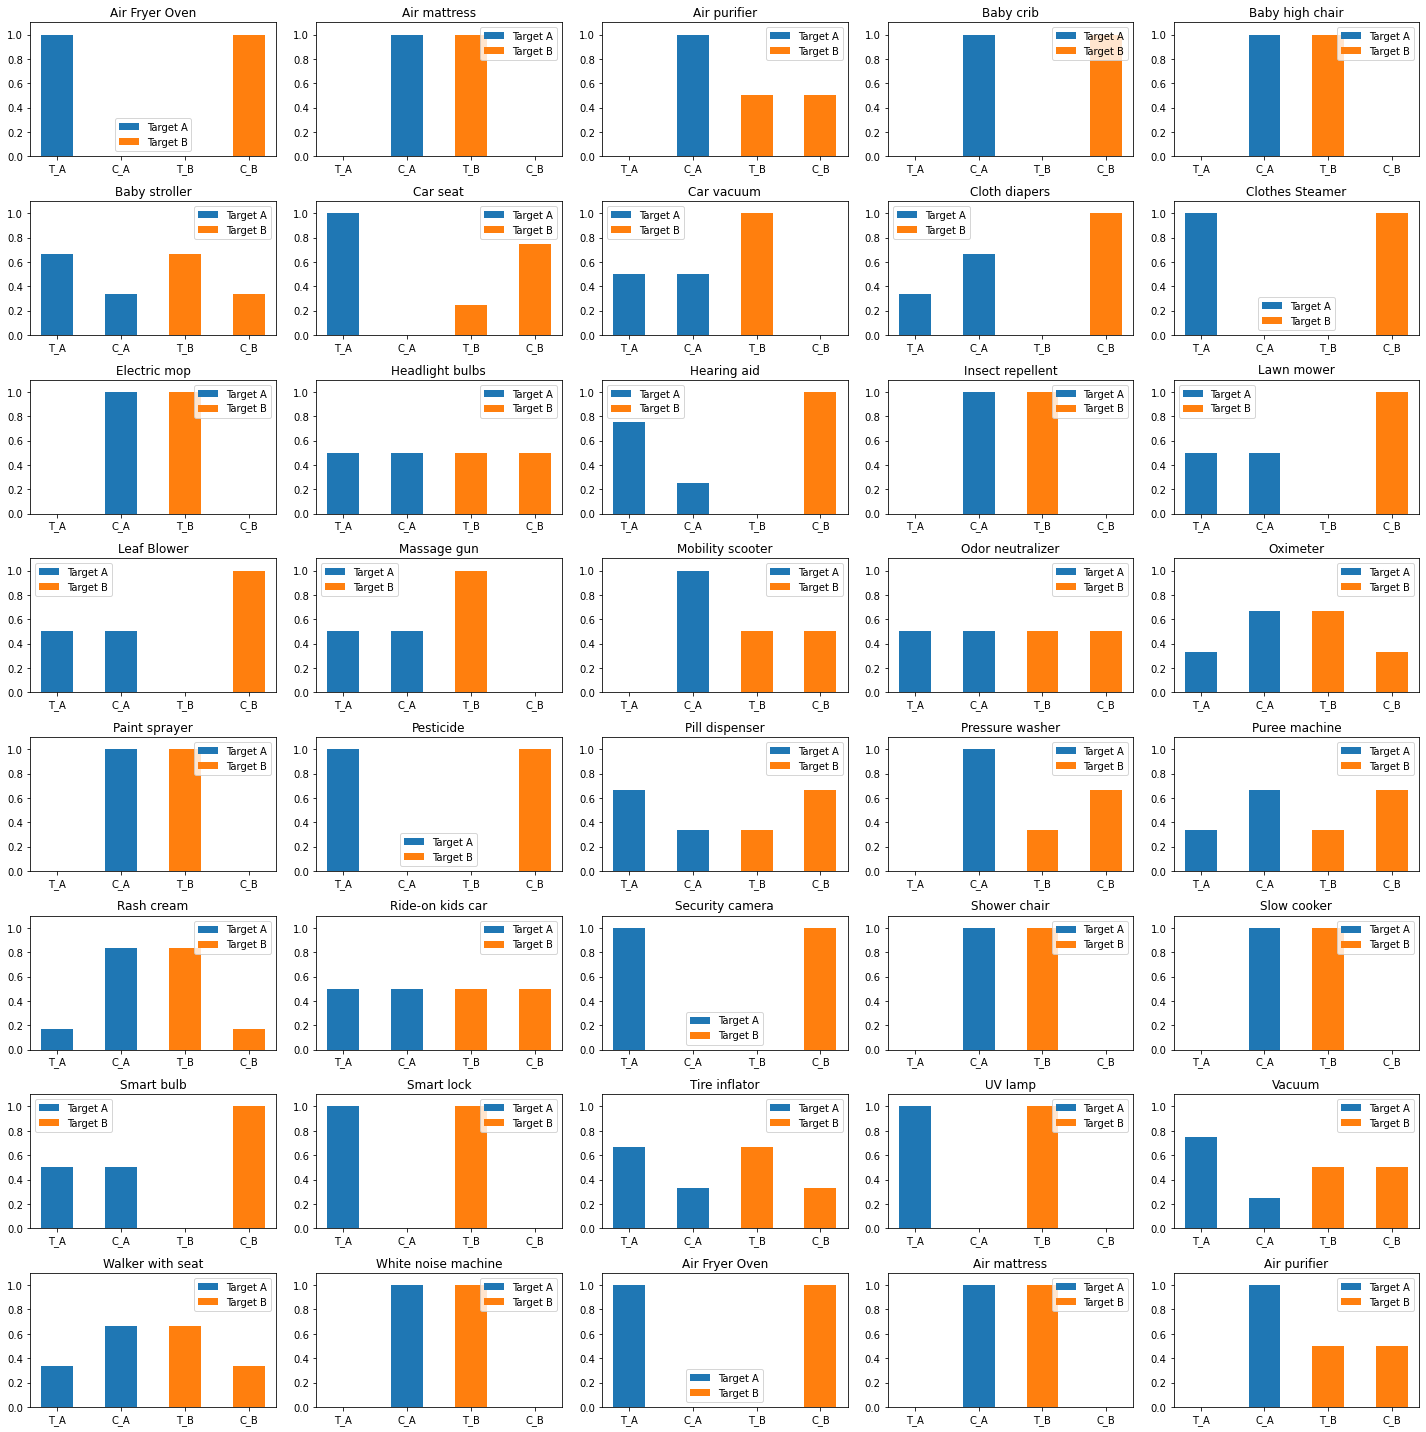

In [35]:
fig, ax = plt.subplots(8, 5, figsize=(20, 20))

counter = 0

labels1 = ["T_A", "C_A"]
labels2 = ["T_B", "C_B"]

n = item_list.shape[0]

for x in range(8):
    
    for xi in range(5):
        
        if (counter == (n - 1)):
            counter = 0
        
        y1 = np.array([Phan_items_targets_A[counter], Phan_items_competitors_A[counter]])
        y2 = np.array([Phan_items_targets_B[counter], Phan_items_competitors_B[counter]])
        ax[x][xi].bar(labels1, y1, 0.5, capsize=8, label="Target A")
        ax[x][xi].bar(labels2, y2, 0.5, capsize=8, label="Target B")
        ax[x][xi].set_ylim(0, 1.1)
        ax[x][xi].set_title(item_list[counter])
        ax[x][xi].legend()
        counter = counter + 1

plt.tight_layout()

### Which items fail to display decoy effects?


In [36]:
# To detect which items might need to be replaced, I will look into the decoy effects that are working as expected. 
# In these, I will look for the items that produce counter-expected(inverse) results or show that one dimension
# is consistently overvalued (compared to the other dimension).

def accessing_dfs(df, item): 
    try: 
        target = df[df["Item"] == item]["Target(%)"]
        competitor = df[df["Item"] == item]["Competitor(%)"]
        #print(item)
        ratio = float(target - competitor)
        #ratio = ratio*100
    except:
        ratio = 0
    return ratio

In [37]:
decoy_A_Items_TargetA_df[decoy_A_Items_TargetA_df["Item"] == "Air Fryer Oven"]["Target(%)"] - decoy_A_Items_TargetA_df[decoy_A_Items_TargetA_df["Item"] == "Air Fryer Oven"]["Competitor(%)"]

print(decoy_C_Items_TargetA_df[decoy_C_Items_TargetA_df["Item"] == "Mobility scooter"]["Target(%)"])

#for item in items_list:

    #Att_A = accessing_dfs(decoy_A_Items_TargetA_df, item)
    
#decoy_A_Items_TargetA_df.head(40)


9    0.5
Name: Target(%), dtype: float64


In [38]:

inspecting_items_df = pd.DataFrame(columns=['Item', 'Att_A', "Att_B", "Com_A", "Com_B"]) # "Sim_A", "Sim_B"

items_list = decoy_A_Items_TargetA_df["Item"].unique() 
items_list = np.append(items_list, decoy_A_Items_TargetB_df["Item"].unique())
items_list = np.append(items_list, decoy_C_Items_TargetA_df["Item"].unique())
items_list = np.append(items_list, decoy_C_Items_TargetB_df["Item"].unique())
items_list = np.unique(items_list)        
    
print(items_list.shape)

for item in items_list:
    #print(item)
    Att_A = round(accessing_dfs(decoy_A_Items_TargetA_df, item), 2)
    Att_B = round(accessing_dfs(decoy_A_Items_TargetB_df, item), 2)
    Com_A = round(accessing_dfs(decoy_C_Items_TargetA_df, item), 2)
    Com_B = round(accessing_dfs(decoy_C_Items_TargetB_df, item), 2)

    current_item = pd.DataFrame(data={'Item': item, 'Att_A': Att_A, "Att_B": Att_B, "Com_A": Com_A, "Com_B": Com_B}, index=range(1))
    inspecting_items_df = inspecting_items_df.append(current_item, ignore_index = True)

inspecting_items_df.head(40)


(40,)


,Item,Att_A,Att_B,Com_A,Com_B
0,Air Fryer Oven,0.33,0.67,1.00,1.00
1,Air mattress,-0.20,0.40,1.00,1.00
2,Air purifier,-1.00,0.50,0.33,1.00
3,Baby crib,0.67,1.00,0.00,1.00
4,Baby high chair,-1.00,1.00,-1.00,0.25
5,Baby stroller,0.33,0.33,0.00,0.00
6,Car seat,1.00,-1.00,1.00,-0.67
7,Car vacuum,-1.00,1.00,0.50,0.00
8,Cloth diapers,0.00,0.00,1.00,0.00
9,Clothes Steamer,1.00,-0.33,1.00,-1.00


#### Notes about items (Which are good and which might need to be changed?): 

In [ ]:
# Items that show that display strong Attraction and Compromise Decoy effects:
# - Ride-on kids car: 0.50, 1.00, 1.00, 1.00
# - UV lamp: 1.00, 1.00, 0.50, 0.00

# Items that are failing to display Attraction and Compromise Decoy effects: 
# - Baby high chair:-1.00, 1.00, -1.00, 0.25
# - Car seat: 1.00, -1.00, 1.00, -0.67
# - Car vacuum: -1.00, 1.00, 0.50, 0.00
# - Clothes Steamer: 1.00, -0.33, 1.00, -1.00
# - Insect repellent: 1.00, -1.00, -1.00, 1.00
# - Metal detector: -0.25, 1.00, -0.33, 0.67
# - Pill dispenser: -0.33, 0.33, -1.00, -0.33
# - Smart bulb: 0.33, -0.67, 0.00, 1.00
# - Smart lock: -1.00, 0.25, -1.00, 0.33
# - Vacuum: 1.00, -1.00, 1.00, -1.00
# - White noise machine: -0.50, 0.50, 0.00, 1.00

# Having a (-1.00) and a (1.00) within the same decoy effect, means one attribute is totally domination another. 
# Having a (-1.00) means one attribute (the attribute favoring the competitor) totally dominates the 
# alternative attribute.
# Having (0.00) when target A or B (_A, _B) can mean several things. One is that this item hasn't been presented in
# this type of decoy.


ValueError: x and y must be the same size

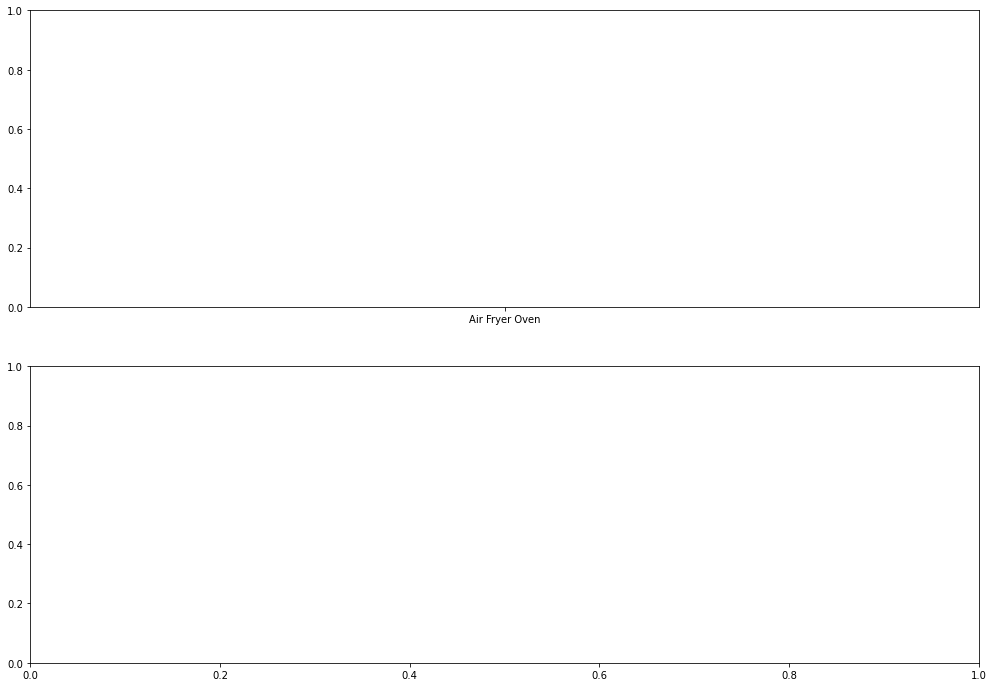

In [39]:
fig, ax = plt.subplots(2, 1, figsize=(17, 12))

ax[0].scatter(item_list, Att_items_targets_A, c="red", marker="^", label="Target")
ax[0].scatter(item_list, Att_items_competitors_A, c="blue", marker="s", label="Competitor")
ax[0].scatter(item_list, Att_items_decoys_A, c="green", marker="o", label="Decoy")
for tick in ax[0].get_xticklabels():
    tick.set_rotation(75)
ax[0].legend(loc='center right')

ax[1].scatter(item_list, Att_items_targets_B, c="red", marker="^", label="Target")
ax[1].scatter(item_list, Att_items_competitors_B, c="blue", marker="s", label="Competitor")
ax[1].scatter(item_list, Att_items_decoys_B, c="green", marker="o", label="Decoy")
for tick in ax[1].get_xticklabels():
    tick.set_rotation(75)
ax[1].legend(loc='center right')

plt.tight_layout()

## Post-Experiment Explanatory Display (For Participants)

### Similarity Decoy

In [ ]:
title1 = "Similarity Decoy"
title2 = "Similarity Target A"
title3 = "Similarity Target B"

target = target_S 
competitor = competitor_S 
decoy = decoy_S

labels = ['Taget', 'Competitor', 'Decoy']
x = np.arange(len(labels)) 
y = np.array([target, competitor, decoy])
fig, ax = plt.subplots(1, 3 ,figsize=(15, 5))
ax[0].bar(labels, y, 0.9)
ax[0].set_ylim(0, 1)
ax[0].set_ylabel('Percentage')
ax[0].set_title(title1)

decoy1_coords = np.array([8.1, 6.1])
decoy1_title = "S_A"
x2 = np.array([8,  8.5, decoy1_coords[0]])
y2 = np.array([6.6, 4.3, decoy1_coords[1]])
ax[1].scatter(x2, y2)
ax[1].annotate("A", (x2[0], y2[0]))
ax[1].annotate("B", (x2[1], y2[1]))
ax[1].annotate(decoy1_title, (decoy1_coords[0], decoy1_coords[1]))
ax[1].set_title(title2)
ax[1].set_ylabel('Attribute 1')
ax[1].set_xlabel('Attribute 2')
ax[1].set_xlim(7.5, 9)
ax[1].set_ylim(4, 7)
ax[1].annotate(text="", xy=(8.55, 4.7), xytext=(8.3, 6), arrowprops={"arrowstyle": '->'}) 
ax[1].annotate(text="S_A increase the \nselection of B", xy=(8.4, 5.7))
ax[1].axes.xaxis.set_ticks([])
ax[1].axes.yaxis.set_ticks([])

decoy2_coords = np.array([8.4, 4.8])
decoy2_title = "S_B"
x3 = np.array([8,  8.5, decoy2_coords[0]])
y3 = np.array([6.6, 4.3, decoy2_coords[1]])
ax[2].scatter(x3, y3)
ax[2].annotate("A", (x3[0], y3[0]))
ax[2].annotate("B", (x3[1], y3[1]))
ax[2].annotate(decoy2_title, (decoy2_coords[0], decoy2_coords[1]))
ax[2].set_title(title3)
ax[2].set_ylabel('Attribute 1')
ax[2].set_xlabel('Attribute 2')
ax[2].set_xlim(7.5, 9)
ax[2].set_ylim(3.9, 7)
ax[2].annotate(text="", xy=(8.15, 6.5), xytext=(8.45, 5.1), arrowprops={"arrowstyle": '->'}) 
ax[2].annotate(text="S_B increase the \nselection of A", xy=(8.45, 5.3))
ax[2].axes.xaxis.set_ticks([])
ax[2].axes.yaxis.set_ticks([])

plt.show()  


### Compromise Decoy


In [ ]:
title1 = "Compromise Decoy"
title2 = "Compromise Target A"
title3 = "Compromise Target B"

target = target_C 
competitor = competitor_C 
decoy = decoy_C

labels = ['Taget', 'Competitor', 'Decoy']
x = np.arange(len(labels)) 
y = np.array([target, competitor, decoy])
fig, ax = plt.subplots(1, 3 ,figsize=(15, 5))
ax[0].bar(labels, y, 0.9)
ax[0].set_ylim(0, 1)
ax[0].set_ylabel('Percentage')
ax[0].set_title(title1)

decoy1_coords = np.array([7.5, 9.0])
decoy1_title = "C_A"
x2 = np.array([8,  8.5, decoy1_coords[0]])
y2 = np.array([6.6, 4.3, decoy1_coords[1]])
ax[1].scatter(x2, y2)
ax[1].annotate("A", (x2[0], y2[0]))
ax[1].annotate("B", (x2[1], y2[1]))
ax[1].annotate(decoy1_title, (decoy1_coords[0], decoy1_coords[1]))
ax[1].set_title(title2)
ax[1].set_ylabel('Attribute 1')
ax[1].set_xlabel('Attribute 2')
ax[1].set_xlim(7, 9)
ax[1].set_ylim(2, 10)
ax[1].annotate(text="", xy=(8.0, 7.3), xytext=(7.75, 8.85), arrowprops={"arrowstyle": '->'}) 
ax[1].annotate(text="C_A increases \nselection of A", xy=(7.8, 9))
ax[1].axes.xaxis.set_ticks([])
ax[1].axes.yaxis.set_ticks([])

decoy2_coords = np.array([9.0, 2.0])
decoy2_title = "C_B"
x3 = np.array([8,  8.5, decoy2_coords[0]])
y3 = np.array([6.6, 4.3, decoy2_coords[1]])
ax[2].scatter(x3, y3)
ax[2].annotate("A", (x3[0], y3[0]))
ax[2].annotate("B", (x3[1], y3[1]))
ax[2].annotate(decoy2_title, (decoy2_coords[0], decoy2_coords[1]))
ax[2].set_title(title3)
ax[2].set_ylabel('Attribute 1')
ax[2].set_xlabel('Attribute 2')
ax[2].set_xlim(7.5, 10)
ax[2].set_ylim(0, 8)
ax[2].annotate(text="", xy=(8.65, 4.1), xytext=(9., 2.5), arrowprops={"arrowstyle": '->'}) 
ax[2].annotate(text="C_B increase \nselection of B", xy=(9, 3.2))
ax[2].axes.xaxis.set_ticks([])
ax[2].axes.yaxis.set_ticks([])

plt.show()  

### Attraction Decoy


In [ ]:
title1 = "Attraction Decoy"
title2 = "Attraction Target A"
title3 = "Attraction Target B"

data_att_tar = group_att_freq_df["Target(%)"].std()
data_att_comp = group_att_freq_df["Competitor(%)"].std()
data_att_dec = group_att_freq_df["Att_Decoy(%)"].std()
data_att_stds = np.array([data_att_tar, data_att_comp, data_att_dec])

target = round(group_att_freq_df["Target(%)"].mean(), 2)
competitor = round(group_att_freq_df["Competitor(%)"].mean(), 2)
decoy = round(group_att_freq_df["Att_Decoy(%)"].mean(), 2)

labels = ['Taget', 'Competitor', 'Decoy']
x = np.arange(len(labels)) 
y = np.array([target, competitor, decoy])
fig, ax = plt.subplots(1, 3 ,figsize=(15, 5))
ax[0].bar(labels, y, 0.9, yerr=data_att_stds, capsize=8)
ax[0].set_ylim(0, 1)
ax[0].set_ylabel('Percentage')
ax[0].set_title(title1)

decoy1_coords = np.array([8.0, 5.5])
decoy1_title = "A_A"
x2 = np.array([8,  8.5, decoy1_coords[0]])
y2 = np.array([6.6, 4.3, decoy1_coords[1]])
ax[1].scatter(x2, y2)
ax[1].annotate("A", (x2[0], y2[0]))
ax[1].annotate("B", (x2[1], y2[1]))
ax[1].annotate(decoy1_title, (decoy1_coords[0], decoy1_coords[1]))
ax[1].set_title(title2)
ax[1].set_ylabel('Attribute 1')
ax[1].set_xlabel('Attribute 2')
ax[1].set_xlim(7.8, 8.7)
ax[1].set_ylim(4, 7)
ax[1].annotate(text="", xy=(8.15, 6.5), xytext=(8.55, 4.6), arrowprops={"arrowstyle": '->'}) 
ax[1].annotate(text="A_A increases \nselection of A", xy=(8.4, 6))
ax[1].axes.xaxis.set_ticks([])
ax[1].axes.yaxis.set_ticks([])

decoy2_coords = np.array([8.25, 4.33])
decoy2_title = "A_B"
x3 = np.array([8,  8.5, decoy2_coords[0]])
y3 = np.array([6.6, 4.3, decoy2_coords[1]])
ax[2].scatter(x3, y3)
ax[2].annotate("A", (x3[0], y3[0]))
ax[2].annotate("B", (x3[1], y3[1]))
ax[2].annotate(decoy2_title, (decoy2_coords[0], decoy2_coords[1]))
ax[2].set_title(title3)
ax[2].set_ylabel('Attribute 1')
ax[2].set_xlabel('Attribute 2')
ax[2].set_xlim(7.8, 8.7)
ax[2].set_ylim(4, 7)
ax[2].annotate(text="", xy=(8.55, 4.6), xytext=(8.09, 6.6), arrowprops={"arrowstyle": '->'}) 
ax[2].annotate(text="A_B increase \nselection of B", xy=(8.3, 6.4))
ax[2].axes.xaxis.set_ticks([])
ax[2].axes.yaxis.set_ticks([])

plt.show()  

In [ ]:
"""
# Phantom Decoy 

decoy_P_df = all_responses[all_responses["Decoy"] == "P"]
decoy_P_df = decoy_P_df.reset_index()
m, n = decoy_P_df.shape 

target_P = 0
competitor_P = 0
decoy_P = 0

for x in range(m):
    option_1 = decoy_P_df["Option_1"][x]
    option_2 = decoy_P_df["Option_2"][x]
    option_3 = decoy_P_df["Option_3"][x]
    choice = decoy_P_df["Choice"][x]
    if((option_1 == "P_A") or (option_2 == "P_A") or (option_3 == "P_A")):
        if(choice == "A"):
            target_P = target_P + 1
        elif(choice == "B"):
            competitor_P = competitor_P + 1
    elif((option_1 == "P_B") or (option_2 == "P_B") or (option_3 == "P_B")):
        if(choice == "B"):
            target_P = target_P + 1
        elif(choice == "A"):
            competitor_P = competitor_P + 1

target_P = target_P/m
competitor_P = competitor_P/m
decoy_P = decoy_P/m
print("Target: " + str(target_P))
print("Competitor: " + str(competitor_P))
print("Decoy: " + str(decoy_P))

barGraphDecoys(target_P, competitor_P, decoy_P, 'Phantom Decoy')

"""

In [ ]:
"""
target_P_HD = 0
competitor_P_HD = 0

target_P_WD = 0
competitor_P_WD = 0

target_P_U = 0
competitor_P_U = 0

decoy_P_HD_count = decoy_P_df[decoy_P_df["PhantomCondition"] == "Highly_desirable"].shape[0]
decoy_P_WD_count = decoy_P_df[decoy_P_df["PhantomCondition"] == "Weakly_desirable"].shape[0]
decoy_P_U_count = decoy_P_df[decoy_P_df["PhantomCondition"] == "Undesirable"].shape[0]

for x in range(m):
    option_1 = decoy_P_df["Option_1"][x]
    option_2 = decoy_P_df["Option_2"][x]
    option_3 = decoy_P_df["Option_3"][x]
    choice = decoy_P_df["Choice"][x]

    if(decoy_P_df["PhantomCondition"][x] == "Highly_desirable"):
        target_P_HD, competitor_P_HD = phantom_choices(option_1, option_2, option_3, choice, target_P_HD, competitor_P_HD)
    elif(decoy_P_df["PhantomCondition"][x] == "Weakly_desirable"):
        target_P_WD, competitor_P_WD = phantom_choices(option_1, option_2, option_3, choice, target_P_WD, competitor_P_WD)
    elif(decoy_P_df["PhantomCondition"][x] == "Undesirable"):
        target_P_U, competitor_P_U = phantom_choices(option_1, option_2, option_3, choice, target_P_U, competitor_P_U)
    else:
        print("Error.")      

target_P_HD = target_P_HD/decoy_P_HD_count
competitor_P_HD = competitor_P_HD/decoy_P_HD_count

target_P_WD = target_P_WD/decoy_P_WD_count
competitor_P_WD = competitor_P_WD/decoy_P_WD_count

target_P_U = target_P_U/decoy_P_U_count
competitor_P_U = competitor_P_U/decoy_P_U_count
        
print("Target HD: " + str(target_P_HD))
print("Competitor HD: " + str(competitor_P_HD))

print("Target WD: " + str(target_P_WD))
print("Competitor WD: " + str(competitor_P_WD))

print("Target U: " + str(target_P_U))
print("Competitor U: " + str(competitor_P_U))
"""

In [ ]:
"""

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

print(Att_items_targets_A[0])
print(Att_items_competitors_A[0])
print(Att_items_decoys_A[0])
print(Att_items_targets_B[0])
print(Att_items_competitors_B[0])
print(Att_items_decoys_B[0])
print(item_list[0])
print(Att_items_targets_A.shape)
print(Att_items_targets_B.shape)
labels1 = ["T_A", "C_A", "AA_A"]
labels2 = ["T_B", "C_B", "AA_B"]
y1 = np.array([Att_items_targets_A[0], Att_items_competitors_A[0], Att_items_decoys_A[0]])
y2 = np.array([Att_items_targets_B[0], Att_items_competitors_B[0], Att_items_decoys_B[0]])

ax.bar(labels1, y1, 0.75, capsize=8, label="Target A")
ax.bar(labels2, y2, 0.75, capsize=8, label="Target B")
ax.legend()
ax.set_ylim(0, 1.1)
ax.set_ylabel('Percentage')
ax.set_title(item_list[0])

"""